In [1]:
import seaborn as sns

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
tips=sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


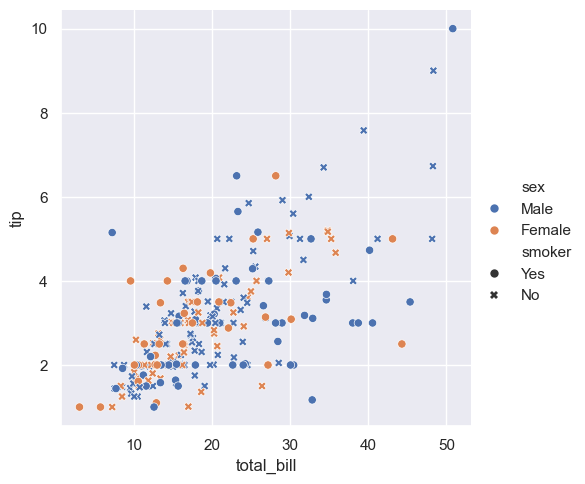

In [16]:
sns.set_theme()
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex",
    style="smoker"
)

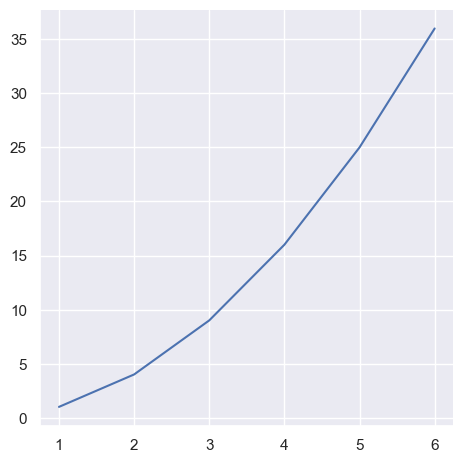

In [27]:
import numpy as np
x=np.array([1,2,3,4,5,6])
y=x**2
sns.relplot(
    kind="line",
    x=x,
    y=y
)

<Axes: xlabel='day', ylabel='tip'>

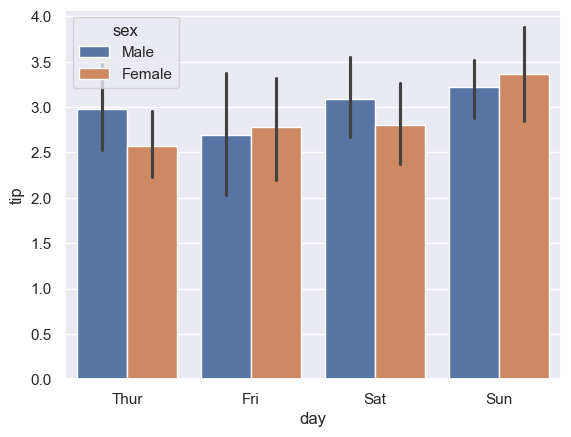

In [29]:
sns.barplot(
    data=tips,
    x="day",
    y="tip",
    hue="sex"
)

<Axes: xlabel='day', ylabel='tip'>

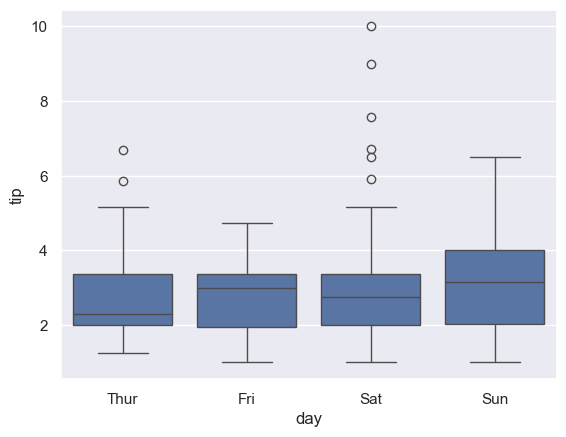

In [30]:
sns.boxplot(
    data=tips,
    x="day",
    y="tip"
)

In [31]:
pengu= sns.load_dataset("penguins")

<Axes: xlabel='body_mass_g', ylabel='Count'>

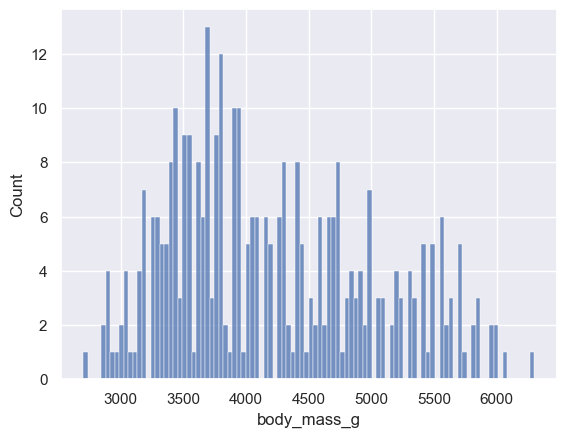

In [34]:
sns.histplot(
    data=pengu,
    x="body_mass_g",
    bins=100
)

In [35]:
flights=sns.load_dataset("flights")

In [36]:
flights_pivot=flights.pivot(index="month",columns="year",values="passengers")

<Axes: xlabel='year', ylabel='month'>

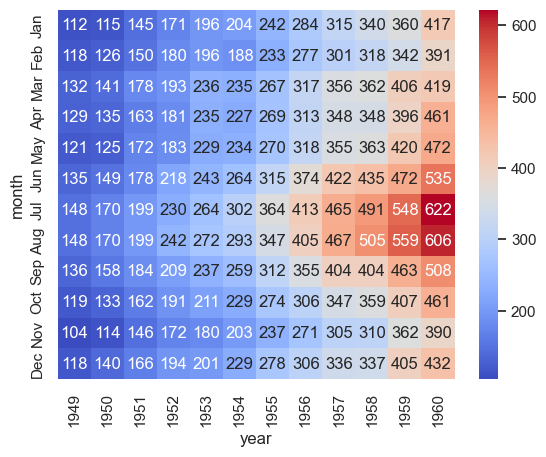

In [40]:
sns.heatmap(
    flights_pivot,
    cmap="coolwarm",
    annot=True,
    fmt="d"
)

<Axes: xlabel='day', ylabel='total_bill'>

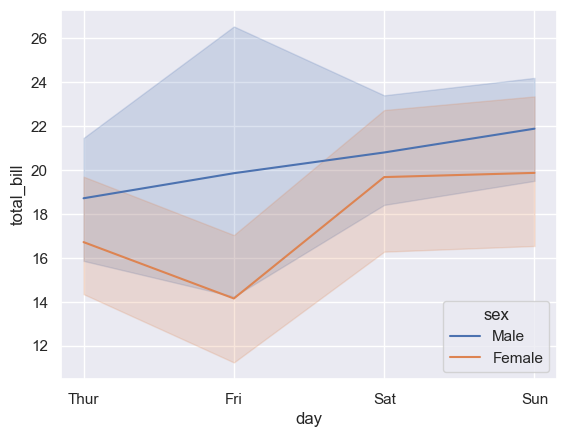

In [41]:
fig,ax=plt.subplots()

sns.lineplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex",
    ax=ax
)

In [42]:
datar=np.random.normal(loc=70, scale=10, size=200)

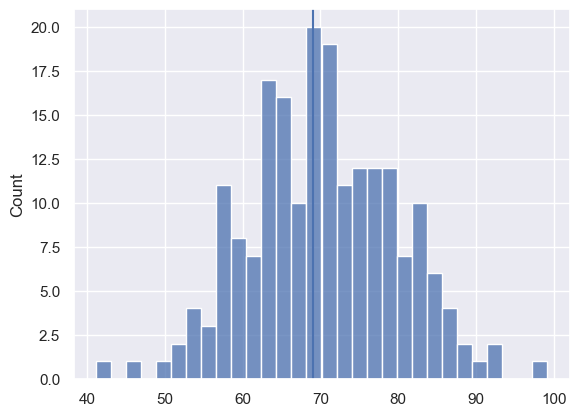

In [65]:
fig,ax=plt.subplots()
sns.histplot(
    datar,
    bins=30,
    ax=ax
)
plt.axvline(x=69)


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

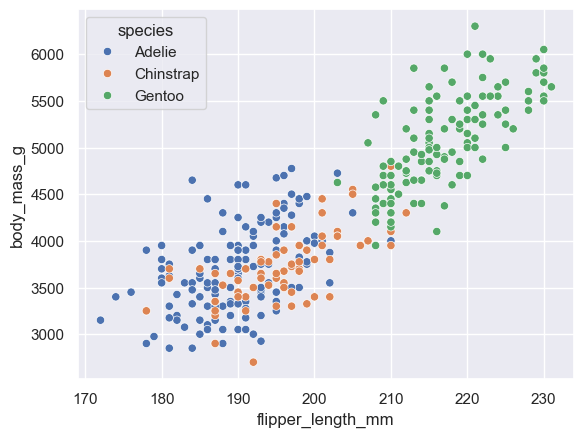

In [66]:
sns.scatterplot(
    data=pengu,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species"
)

<Axes: xlabel='tip', ylabel='total_bill'>

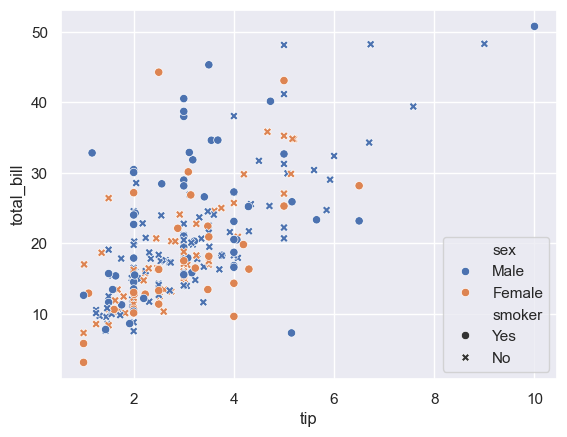

In [71]:
sns.scatterplot(
    data=tips,
    x="tip",
    y="total_bill",
    hue="sex",
    style="smoker"
)

In [86]:
pivot_table = pd.pivot_table(
    tips,
    values="tip",
    index="day",
    columns="time",
    aggfunc="mean"
)
pivot_table

C:\Users\saadk\AppData\Local\Temp\ipykernel_18940\2695666224.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


In [77]:
data = pd.DataFrame({
    "day": tips["day"],
    "time": tips["time"],
    "tip": tips["tip"]
})


In [95]:
data = tips.groupby(
    ["day", "time"],
    observed=True
).agg(avg_tip=("tip", "mean"))


In [101]:
data = (
    tips
    .groupby(["day", "time"], observed=True)
    .agg(avg_tip=("tip", "mean"))
    .reset_index()
)

tipper = data.pivot(
    values="avg_tip",
    index="time",
    columns="day"
)


In [102]:
tipper

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,2.767705,2.382857,NaN,NaN
Dinner,3.000000,2.940000,2.993103,3.255132


<Axes: xlabel='day', ylabel='time'>

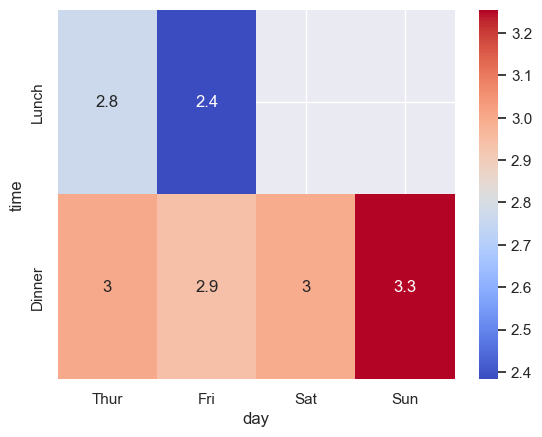

In [107]:
sns.heatmap(
    tipper,
    cmap="coolwarm",
    annot=True,
)